In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [68]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
df.shape

(1000, 8)

In [70]:
df.describe(include="all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [71]:
for x in df.columns:
    print(df[x].value_counts())

gender
female    518
male      482
Name: count, dtype: int64
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test preparation course
none         642
completed    358
Name: count, dtype: int64
math score
65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: count, Length: 81, dtype: int64
reading score
72    34
74    33
64    32
67    30
73    30
      ..
28     1
26     1
17     1
32     1
40     1
Name: count, Length: 72, dtype: int64
writing score
74    35
70    33
68    31
73    28
80    27
      ..
28     1
35     1
19     1
22     1
23     1
Name: count, Length: 77, dtype: int64


In [72]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [73]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [74]:
numerical_cols=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_cols=[feature for feature in df.columns if df[feature].dtype=='O']


for x in categorical_cols:
    print(f"********************* Value Counts -- {x} *************************",df[x].value_counts(),sep='\n')

********************* Value Counts -- gender *************************
gender
female    518
male      482
Name: count, dtype: int64
********************* Value Counts -- race/ethnicity *************************
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
********************* Value Counts -- parental level of education *************************
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
********************* Value Counts -- lunch *************************
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
********************* Value Counts -- test preparation course *************************
test preparation course
none         642
completed    358
Name: count, dtype: int64


In [75]:
df['total']=df[numerical_cols].sum(axis=1)
df['Average']=df[numerical_cols].sum(axis=1)/len(numerical_cols)

In [76]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [77]:
## Top Students count Subject wise
for x in numerical_cols:
    print(f"{x} : {df[df[x]==df[x].max()].shape[0]}")

math score : 7
reading score : 17
writing score : 14


In [78]:
## Low Performin Students count Subject wise
for x in numerical_cols:
    print(f"{x} : {df[df[x]<33.33].shape[0]}")

math score : 20
reading score : 11
writing score : 14


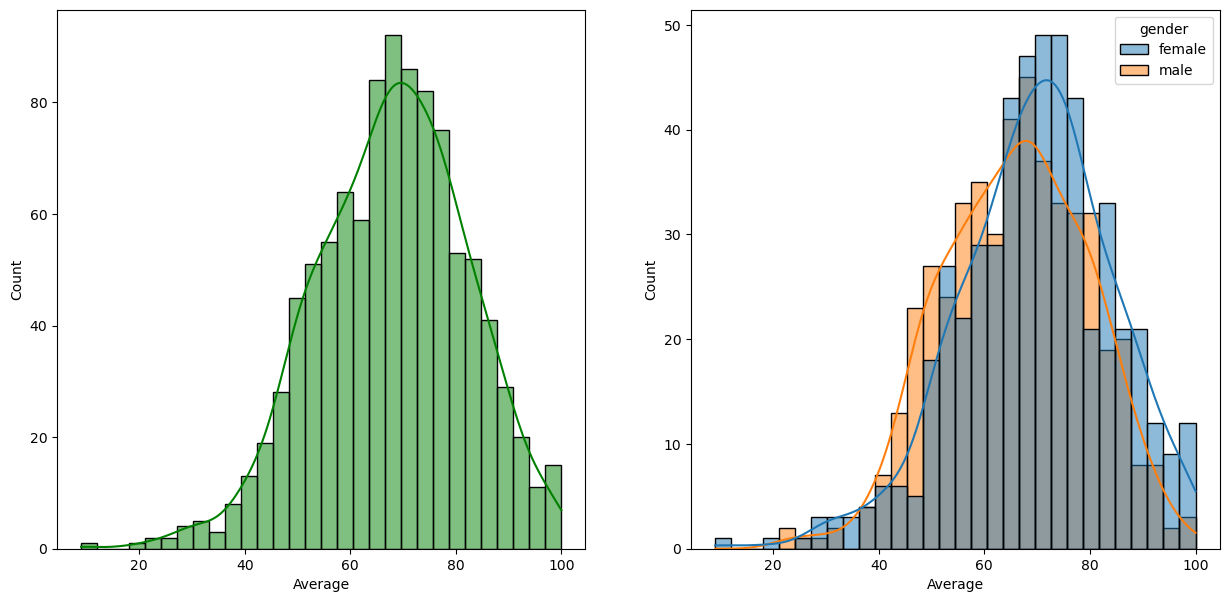

In [79]:
# Histogram and KDE
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',bins=30,kde=True,hue='gender')
plt.show()

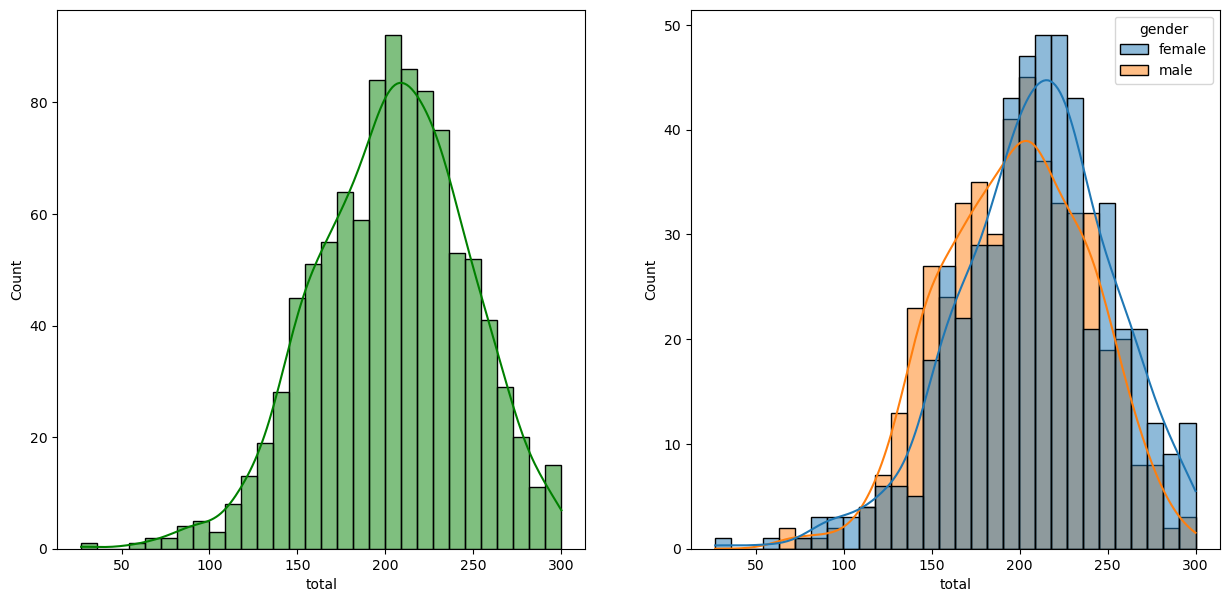

In [80]:
# Histogram and KDE
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total',bins=30,kde=True,hue='gender')
plt.show()

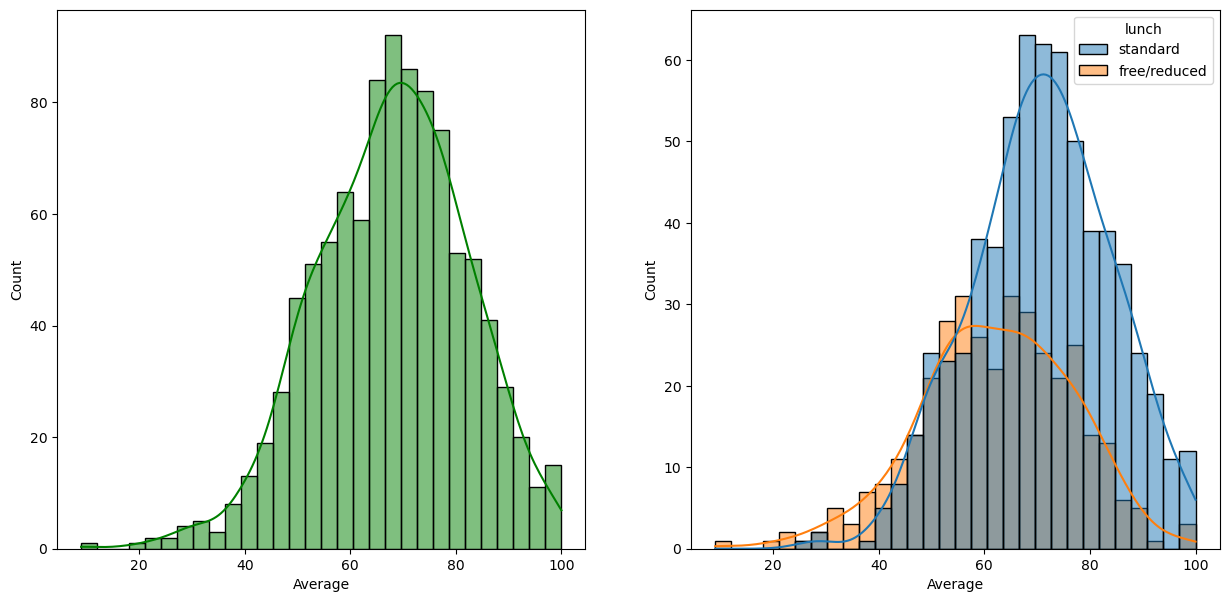

In [81]:
# Histogram and KDE
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',bins=30,kde=True,hue='lunch')
plt.show()

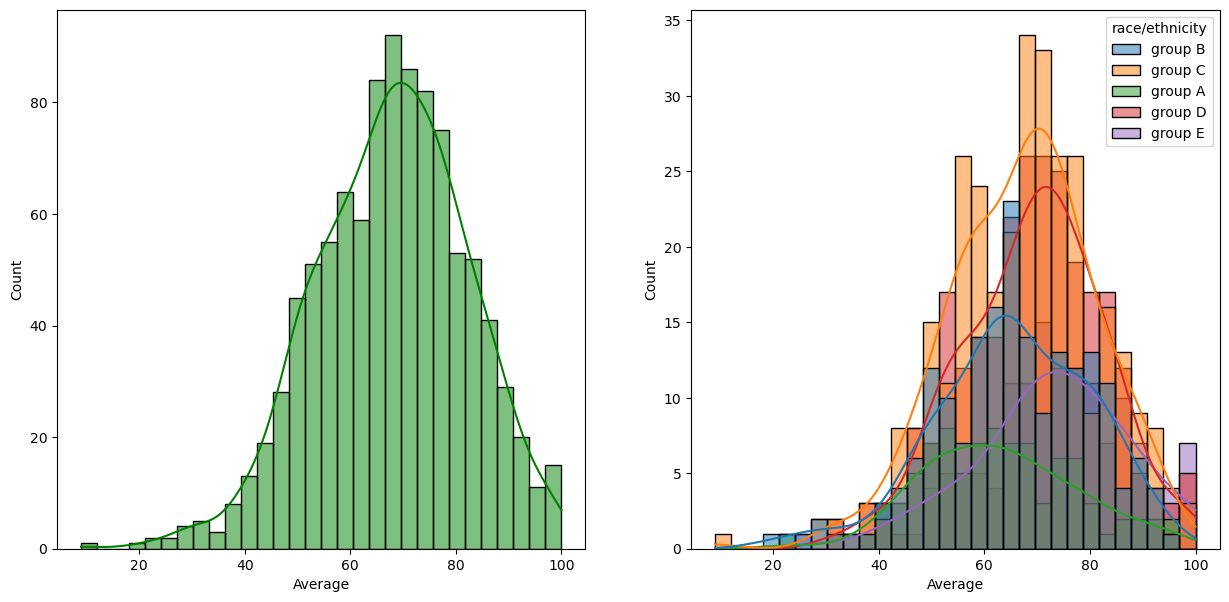

In [82]:
# Histogram and KDE
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',bins=30,kde=True,hue='race/ethnicity')
plt.show()

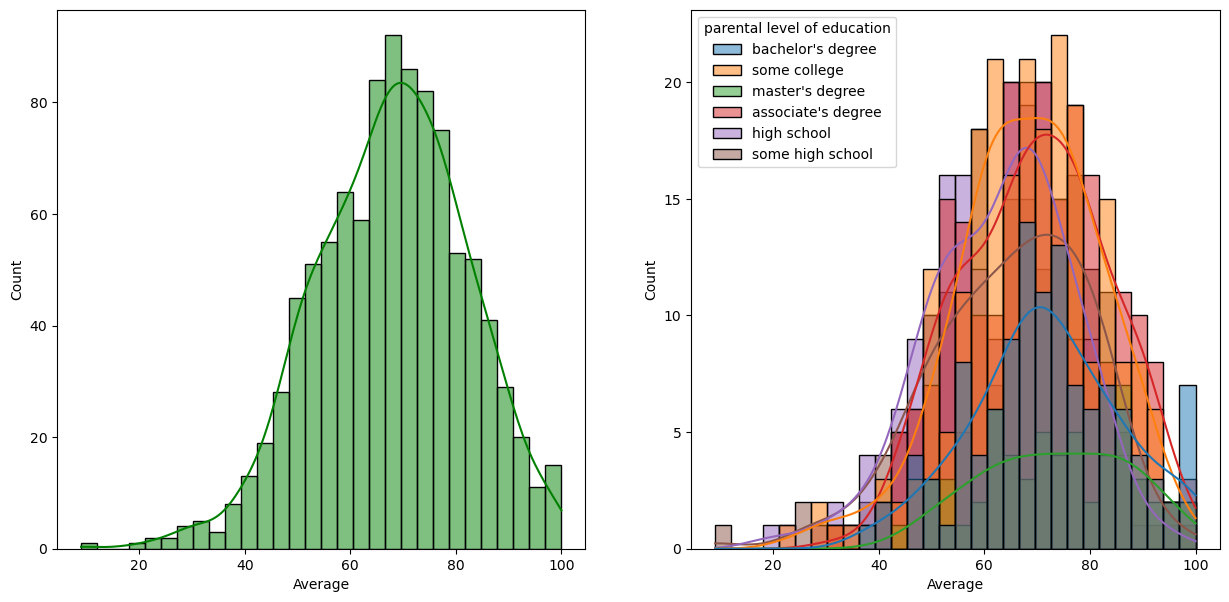

In [83]:
# Histogram and KDE
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',bins=30,kde=True,hue='parental level of education')
plt.show()

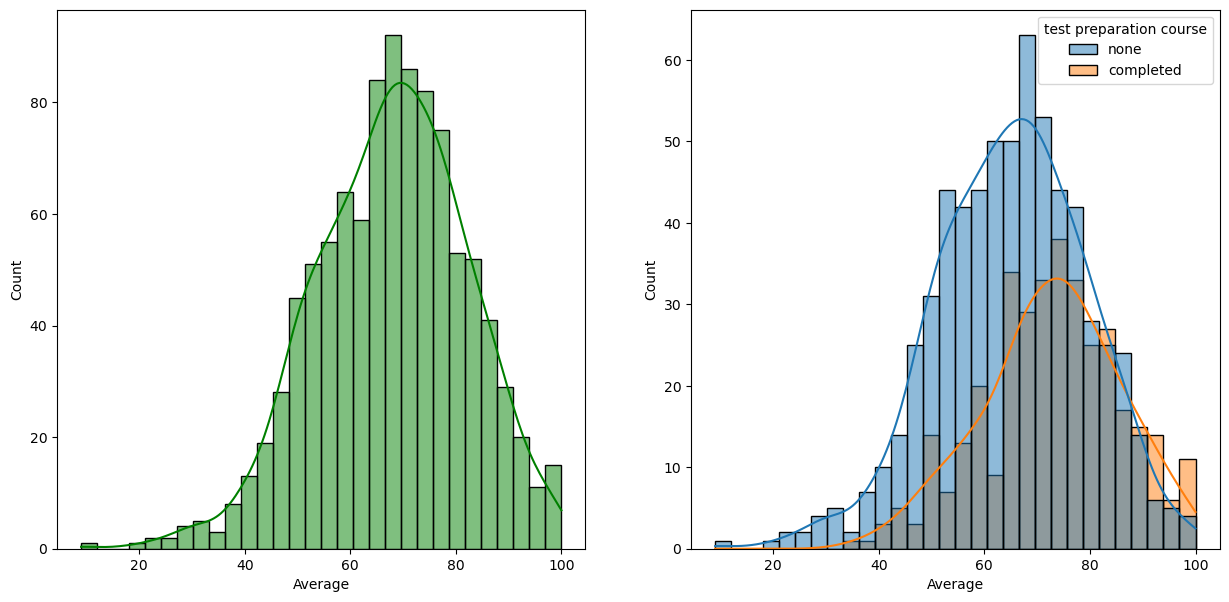

In [84]:
# Histogram and KDE
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',bins=30,kde=True,hue='test preparation course')
plt.show()

## Model Training

In [85]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer


In [86]:
Y=df['Average']
X=df.drop(columns=['Average'],axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [87]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns
numeric_Transformer=StandardScaler()
oh_Transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
                                [
                                    ('OneHotEncoder',oh_Transformer,cat_features),
                                    ('StandardScaler',numeric_Transformer,num_features)
                                ]
                              )
X=preprocessor.fit_transform(X)

In [89]:
X.shape

(1000, 21)

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [97]:
def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square,mse

In [98]:
models={
        "KNN":KNeighborsRegressor(),
        "LinearRegression":LinearRegression(),
        "RidgeRegression":Ridge(),
        "LassoRegression":Lasso(),
        "RandomForestRegressor":RandomForestRegressor(),
        "DecisionTreeRegressor":DecisionTreeRegressor(),
        "CatBoostRegressor":CatBoostRegressor(verbose=False),
        "AdaBoostRegressor":AdaBoostRegressor(),
        "XGBoost":XGBRegressor()      
}

model_list=[]
r2_list=[]


for itr in models.keys():
    model=models[itr]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)


    model_train_mae,model_train_rmse,model_train_r2_square,model_train_mse=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2_square,model_test_mse=evaluate_model(y_test,y_test_pred)


    print ("+"*10,itr,"+"*10)
    print ("--------------------------------- Test Data Performance------------------------------")
    print("Mean Absolute Error : ",model_train_mae)
    print("Root  Mean Squared Error: ",model_train_rmse)
    print("r2 Squared Error : ",model_train_r2_square)
    print("Mean Squared Error : ",model_train_mse)



    print ("--------------------------------- Train Data Performance------------------------------")
    print("Mean Absolute Error : ",model_test_mae)
    print("Root  Mean Squared Error: ",model_test_rmse)
    print("r2 Squared Error : ",model_test_r2_square)
    print("Mean Squared Error : ",model_test_mse)

    print('\n')

++++++++++ KNN ++++++++++
--------------------------------- Test Data Performance------------------------------
Mean Absolute Error :  1.5361904761904763
Root  Mean Squared Error:  1.997979932212486
r2 Squared Error :  0.9792379213147473
Mean Squared Error :  3.9919238095238105
--------------------------------- Train Data Performance------------------------------
Mean Absolute Error :  1.93
Root  Mean Squared Error:  2.6939355762320836
r2 Squared Error :  0.9678075192381349
Mean Squared Error :  7.257288888888889


++++++++++ LinearRegression ++++++++++
--------------------------------- Test Data Performance------------------------------
Mean Absolute Error :  1.0160761121369432e-14
Root  Mean Squared Error:  1.2064289904572806e-14
r2 Squared Error :  1.0
Mean Squared Error :  1.4554709090157732e-28
--------------------------------- Train Data Performance------------------------------
Mean Absolute Error :  1.0894988614988204e-14
Root  Mean Squared Error:  1.2530557632252053e-14
r2 Squ